# Decision Tree

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Loading the dataset

In [4]:
df = sns.load_dataset('iris')

In [27]:
df.shape

(150, 5)

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Load the classifier

#### Entropy

In [6]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
Classifier = DecisionTreeClassifier(criterion='entropy')

In [9]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [10]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [14]:
Classifier.fit(X=X, y=y)

DecisionTreeClassifier(criterion='entropy')

### Plot the tree

In [15]:
from sklearn import tree

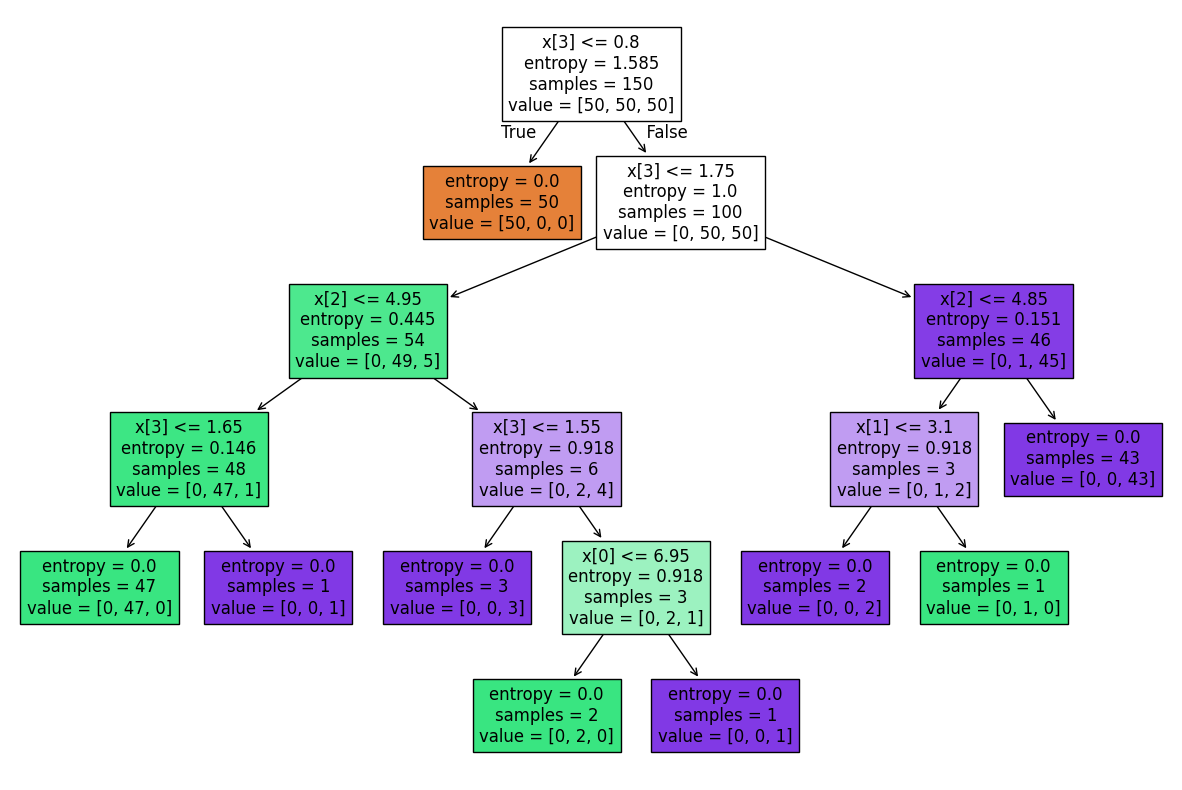

In [17]:
plt.figure(figsize=(15,10))
tree.plot_tree(Classifier,filled=True)
plt.show()

#### Gini Index

In [19]:
Classifier = DecisionTreeClassifier()
Classifier.fit(X,y)

DecisionTreeClassifier()

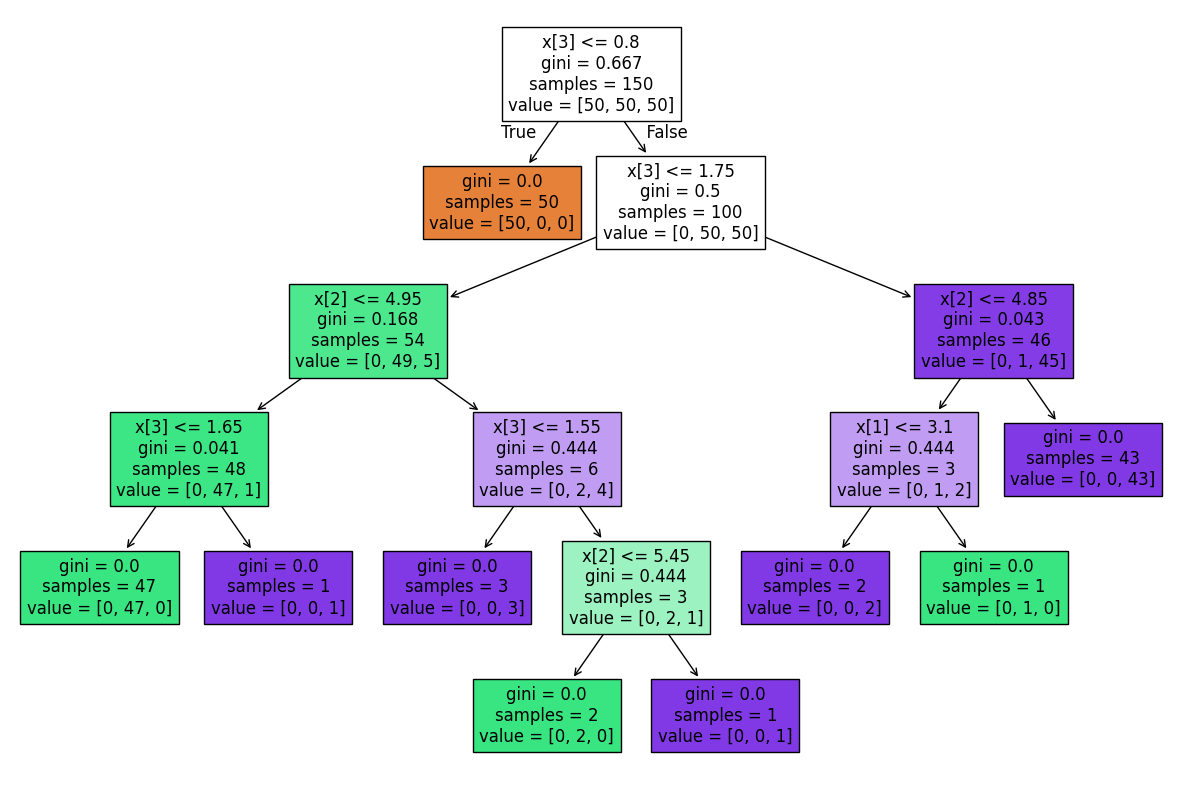

In [22]:
plt.figure(figsize=(15,10))
tree.plot_tree(Classifier,filled=True)
plt.show()

#### Observations

After the depth become 2 , there is no need to split the feature more
So we can prune the tree and can set the maxdepth as 2 only

### Tree after pruning

#### Split the data

In [26]:
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size= 0.3, random_state=32)

In [29]:
Classifier = DecisionTreeClassifier(max_depth= 2)
Classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

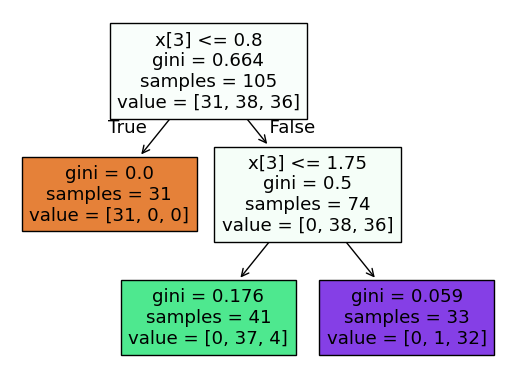

In [30]:
tree.plot_tree(Classifier,filled=True)
plt.show()

In [31]:
y_pred = Classifier.predict(X_test)

In [32]:
y_pred

array(['versicolor', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'versicolor', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'setosa',
       'setosa', 'virginica', 'virginica', 'setosa', 'setosa',
       'versicolor', 'setosa', 'virginica', 'setosa', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'setosa', 'setosa', 'virginica', 'virginica', 'versicolor',
       'setosa', 'virginica', 'setosa', 'virginica', 'setosa'],
      dtype=object)

#### Performace matrix

In [35]:
from sklearn.metrics import accuracy_score , precision_score , recall_score , confusion_matrix

In [34]:
accuracy_score(y_test,y_pred)

0.9777777777777777

In [37]:
confusion_matrix(y_test,y_pred)

array([[19,  0,  0],
       [ 0, 12,  0],
       [ 0,  1, 13]])

In [38]:
Classifier.score()

TypeError: ClassifierMixin.score() missing 2 required positional arguments: 'X' and 'y'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a range of probability values
p_values = np.linspace(0, 1, 100)

# Calculate Entropy and Gini Index
entropy = -p_values * np.log2(p_values + 1e-9) - (1 - p_values) * np.log2(1 - p_values + 1e-9)
gini_index = 2 * p_values * (1 - p_values)

# Plotting Entropy and Gini Index
plt.figure(figsize=(10, 6))
plt.plot(p_values, entropy, label='Entropy', color='blue')
plt.plot(p_values, gini_index, label='Gini Index', color='green')
plt.title("Entropy and Gini Index for Binary Classification")
plt.xlabel("Probability of Class 1 (p)")
plt.ylabel("Impurity Measure")
plt.legend()
plt.grid(True)
plt.show()


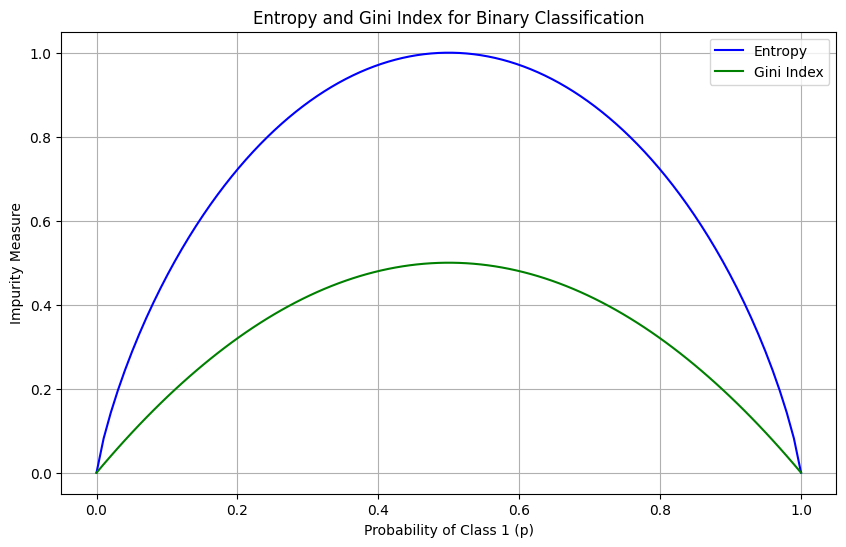

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a range of probability values
p_values = np.linspace(0, 1, 100)

# Calculate Entropy and Gini Index
entropy = -p_values * np.log2(p_values + 1e-9) - (1 - p_values) * np.log2(1 - p_values + 1e-9)
gini_index = 2 * p_values * (1 - p_values)

# Plotting Entropy and Gini Index
plt.figure(figsize=(10, 6))
plt.plot(p_values, entropy, label='Entropy', color='blue')
plt.plot(p_values, gini_index, label='Gini Index', color='green')
plt.title("Entropy and Gini Index for Binary Classification")
plt.xlabel("Probability of Class 1 (p)")
plt.ylabel("Impurity Measure")
plt.legend()
plt.grid(True)
plt.show()


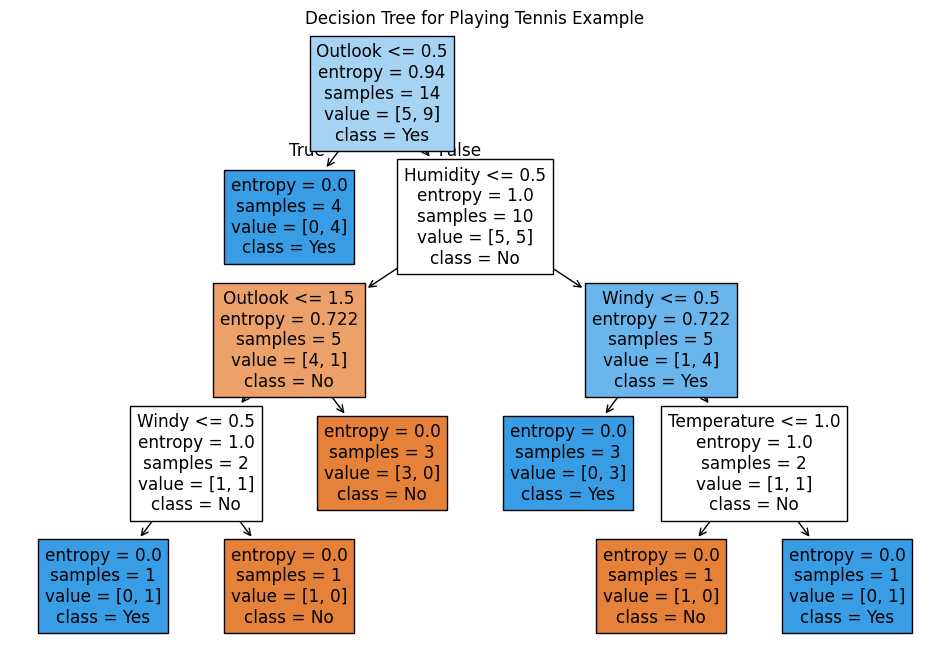

In [2]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast', 'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Windy': [False, True, False, False, False, True, True, False, False, False, True, True, False, True],
    'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

df = pd.DataFrame(data)

# Encode categorical variables
label_encoders = {}
for column in df.columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Features and target
X = df.drop('PlayTennis', axis=1)
y = df['PlayTennis']

# Train Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy', random_state=0)
clf.fit(X, y)

# Plot the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=['Outlook', 'Temperature', 'Humidity', 'Windy'], class_names=['No', 'Yes'], filled=True)
plt.title("Decision Tree for Playing Tennis Example")
plt.show()


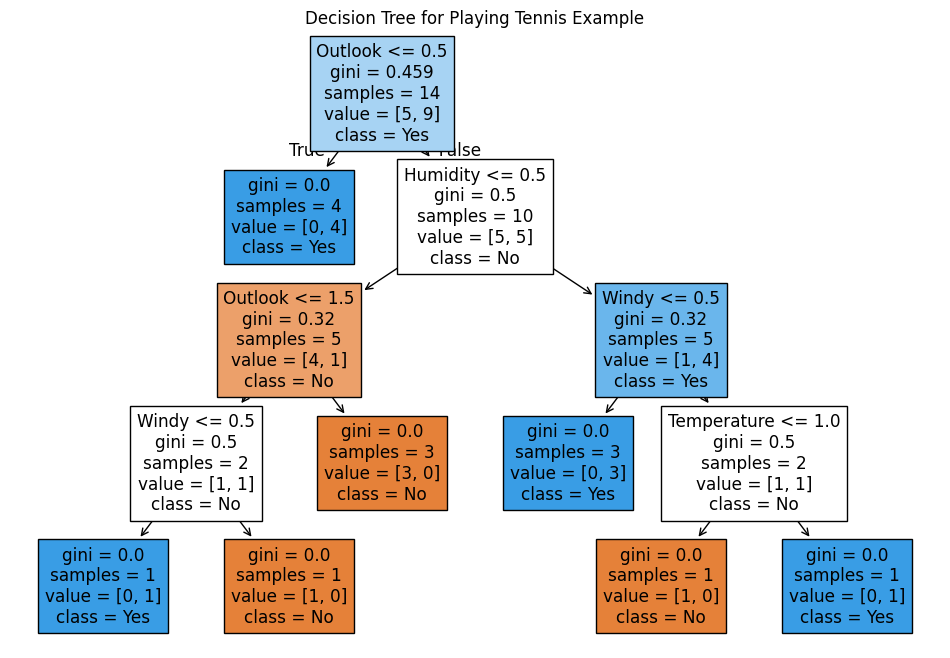

In [1]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast', 'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Windy': [False, True, False, False, False, True, True, False, False, False, True, True, False, True],
    'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

df = pd.DataFrame(data)

# Encode categorical variables
label_encoders = {}
for column in df.columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Features and target
X = df.drop('PlayTennis', axis=1)
y = df['PlayTennis']

# Train Decision Tree Classifier
clf = DecisionTreeClassifier(criterion= 'gini', random_state=0)
clf.fit(X, y)

# Plot the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=['Outlook', 'Temperature', 'Humidity', 'Windy'], class_names=['No', 'Yes'], filled=True)
plt.title("Decision Tree for Playing Tennis Example")
plt.show()


In [10]:
import pandas as pd
import numpy as np

# Sample weather dataset
data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Rainy', 'Sunny', 'Overcast', 'Overcast', 'Rainy'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'],
    'Play': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}
df = pd.DataFrame(data)

# Map categorical features to numeric labels for easier processing
df_encoded = df.apply(lambda x: pd.factorize(x)[0] if x.name != 'Play' else x)
X = df_encoded.drop(columns='Play').values
y = np.array([1 if label == 'Yes' else 0 for label in df['Play']])


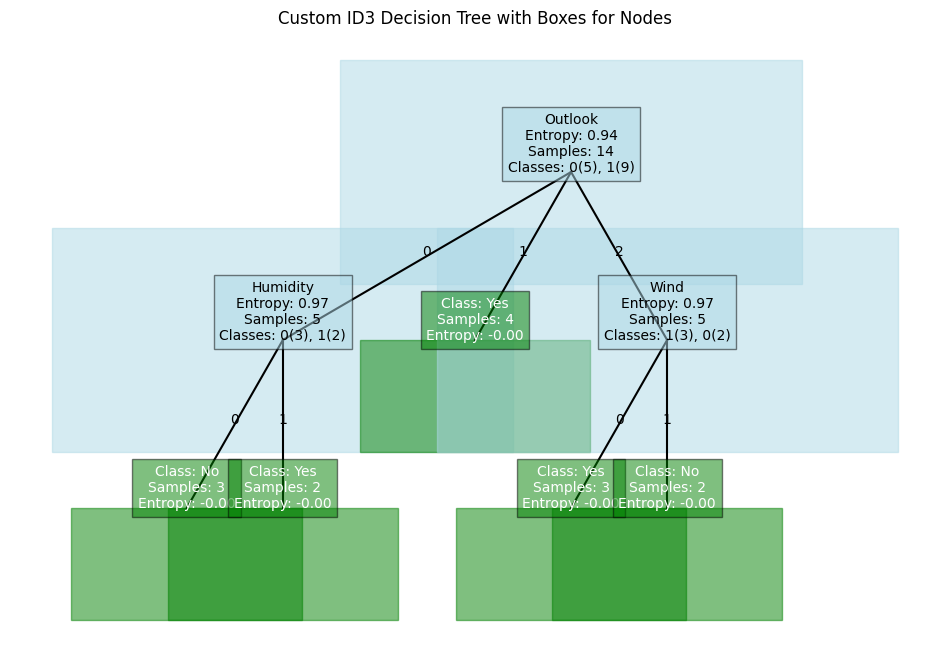

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Sample weather dataset
data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Rainy', 'Sunny', 'Overcast', 'Overcast', 'Rainy'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'],
    'Play': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}
df = pd.DataFrame(data)

# Map categorical features to numeric labels for easier processing
df_encoded = df.apply(lambda x: pd.factorize(x)[0] if x.name != 'Play' else x)
X = df_encoded.drop(columns='Play').values
y = np.array([1 if label == 'Yes' else 0 for label in df['Play']])

# Define entropy function
def entropy(y):
    counts = Counter(y)
    total = len(y)
    return -sum((count / total) * np.log2(count / total) for count in counts.values() if count > 0)

# Calculate information gain
def info_gain(X, y, feature_index):
    parent_entropy = entropy(y)
    values, counts = np.unique(X[:, feature_index], return_counts=True)
    weighted_entropy = sum((counts[i] / len(y)) * entropy(y[X[:, feature_index] == value]) for i, value in enumerate(values))
    return parent_entropy - weighted_entropy

# Select best feature
def best_feature(X, y):
    gains = [info_gain(X, y, feature) for feature in range(X.shape[1])]
    return np.argmax(gains) if max(gains) > 0 else None

# Build the ID3 tree
class ID3Tree:
    def __init__(self, depth=0, max_depth=None):
        self.depth = depth
        self.max_depth = max_depth
        self.feature = None
        self.children = {}
        self.is_leaf = False
        self.label = None
        self.y = None  # Store target values at each node for plotting

    def fit(self, X, y):
        self.y = y  # Store target values for this node
        if len(set(y)) == 1:
            self.is_leaf = True
            self.label = y[0]
            return
        if self.max_depth and self.depth >= self.max_depth:
            self.is_leaf = True
            self.label = Counter(y).most_common(1)[0][0]
            return
        
        self.feature = best_feature(X, y)
        if self.feature is None:
            self.is_leaf = True
            self.label = Counter(y).most_common(1)[0][0]
            return
        
        feature_values = np.unique(X[:, self.feature])
        for value in feature_values:
            sub_X = X[X[:, self.feature] == value]
            sub_y = y[X[:, self.feature] == value]
            child = ID3Tree(depth=self.depth + 1, max_depth=self.max_depth)
            child.fit(sub_X, sub_y)
            self.children[value] = child

    def predict(self, x):
        if self.is_leaf:
            return self.label
        value = x[self.feature]
        if value in self.children:
            return self.children[value].predict(x)
        else:
            return Counter(y).most_common(1)[0][0]  # Fallback

# Modified plot function with boxes
def plot_id3_tree(node, feature_names, pos=(0.5, 1), spread=0.5, depth=0):
    if node.is_leaf:
        label_text = f"Class: {'Yes' if node.label == 1 else 'No'}\nSamples: {len(node.y)}\nEntropy: {entropy(node.y):.2f}"
        bbox = dict(facecolor='green', alpha=0.5)
        plt.gca().add_patch(plt.Rectangle((pos[0]-0.1, pos[1]-0.1), 0.2, 0.1, fill=True, color='green', alpha=0.5))
        plt.text(pos[0], pos[1], label_text, ha='center', color="white", fontsize=10, bbox=bbox)
    else:
        feature_name = feature_names[node.feature]
        entropy_value = entropy(node.y)
        class_counts = Counter(node.y)
        node_text = f"{feature_name}\nEntropy: {entropy_value:.2f}\nSamples: {len(node.y)}\n"
        node_text += f"Classes: " + ", ".join([f"{cls}({count})" for cls, count in class_counts.items()])
        bbox = dict(facecolor='lightblue', alpha=0.5)
        plt.gca().add_patch(plt.Rectangle((pos[0]-0.2, pos[1]-0.1), 0.4, 0.2, fill=True, color='lightblue', alpha=0.5))
        plt.text(pos[0], pos[1], node_text, ha='center', color="black", fontsize=10, bbox=bbox)

        y_new = pos[1] - 0.15
        spread_new = spread / len(node.children)

        for i, (feature_value, child) in enumerate(node.children.items()):
            x_new = pos[0] - spread / 2 + i * spread_new
            plt.plot([pos[0], x_new], [pos[1], y_new], 'k-')
            plt.text((pos[0] + x_new) / 2, (pos[1] + y_new) / 2, f"{feature_value}", ha='center')
            plot_id3_tree(child, feature_names, pos=(x_new, y_new), spread=spread_new, depth=depth + 1)

# Train the model
model = ID3Tree(max_depth=3)
model.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_id3_tree(model, feature_names=df_encoded.columns[:-1])
plt.title("Custom ID3 Decision Tree with Boxes for Nodes")
plt.axis('off')
plt.show()


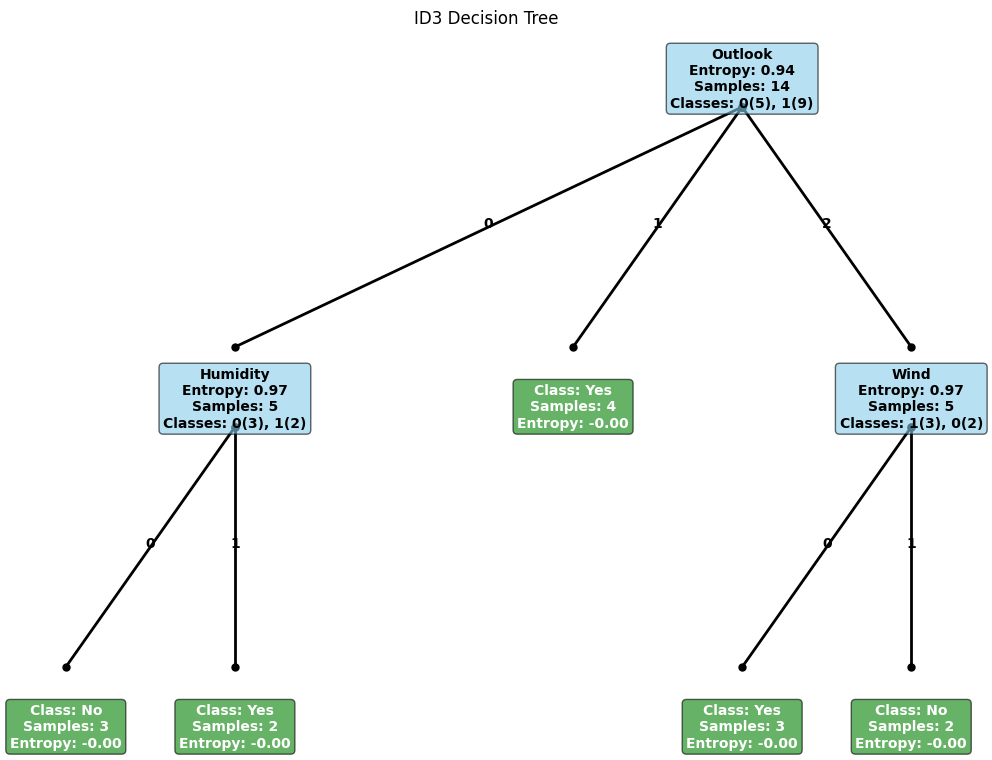

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Sample weather dataset
data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Rainy', 'Sunny', 'Overcast', 'Overcast', 'Rainy'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'],
    'Play': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}
df = pd.DataFrame(data)

# Map categorical features to numeric labels for easier processing
df_encoded = df.apply(lambda x: pd.factorize(x)[0] if x.name != 'Play' else x)
X = df_encoded.drop(columns='Play').values
y = np.array([1 if label == 'Yes' else 0 for label in df['Play']])

# Define entropy function
def entropy(y):
    counts = Counter(y)
    total = len(y)
    return -sum((count / total) * np.log2(count / total) for count in counts.values() if count > 0)

# Calculate information gain
def info_gain(X, y, feature_index):
    parent_entropy = entropy(y)
    values, counts = np.unique(X[:, feature_index], return_counts=True)
    weighted_entropy = sum((counts[i] / len(y)) * entropy(y[X[:, feature_index] == value]) for i, value in enumerate(values))
    return parent_entropy - weighted_entropy

# Select best feature
def best_feature(X, y):
    gains = [info_gain(X, y, feature) for feature in range(X.shape[1])]
    return np.argmax(gains) if max(gains) > 0 else None

# Build the ID3 tree
class ID3Tree:
    def __init__(self, depth=0, max_depth=None):
        self.depth = depth
        self.max_depth = max_depth
        self.feature = None
        self.children = {}
        self.is_leaf = False
        self.label = None
        self.y = None  # Store target values at each node for plotting

    def fit(self, X, y):
        self.y = y  # Store target values for this node
        if len(set(y)) == 1:
            self.is_leaf = True
            self.label = y[0]
            return
        if self.max_depth and self.depth >= self.max_depth:
            self.is_leaf = True
            self.label = Counter(y).most_common(1)[0][0]
            return
        
        self.feature = best_feature(X, y)
        if self.feature is None:
            self.is_leaf = True
            self.label = Counter(y).most_common(1)[0][0]
            return
        
        feature_values = np.unique(X[:, self.feature])
        for value in feature_values:
            sub_X = X[X[:, self.feature] == value]
            sub_y = y[X[:, self.feature] == value]
            child = ID3Tree(depth=self.depth + 1, max_depth=self.max_depth)
            child.fit(sub_X, sub_y)
            self.children[value] = child

    def predict(self, x):
        if self.is_leaf:
            return self.label
        value = x[self.feature]
        if value in self.children:
            return self.children[value].predict(x)
        else:
            return Counter(y).most_common(1)[0][0]  # Fallback

# Enhanced plot function with shorter split lines and adjusted title
def plot_id3_tree(node, feature_names, pos=(0.5, 1), spread=0.5, depth=0):
    if node.is_leaf:
        label_text = f"Class: {'Yes' if node.label == 1 else 'No'}\nSamples: {len(node.y)}\nEntropy: {entropy(node.y):.2f}"
        bbox = dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor='green', alpha=0.6)
        plt.text(pos[0], pos[1], label_text, ha='center', color="white", fontsize=10, bbox=bbox, fontweight='bold')
    else:
        feature_name = feature_names[node.feature]
        entropy_value = entropy(node.y)
        class_counts = Counter(node.y)
        node_text = f"{feature_name}\nEntropy: {entropy_value:.2f}\nSamples: {len(node.y)}\n"
        node_text += f"Classes: " + ", ".join([f"{cls}({count})" for cls, count in class_counts.items()])
        bbox = dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor='skyblue', alpha=0.6)
        plt.text(pos[0], pos[1], node_text, ha='center', color="black", fontsize=10, bbox=bbox, fontweight='bold')

        y_new = pos[1] - 0.12  # Reduced line length
        spread_new = spread / len(node.children)

        for i, (feature_value, child) in enumerate(node.children.items()):
            x_new = pos[0] - spread / 2 + i * spread_new
            plt.plot([pos[0], x_new], [pos[1], y_new + 0.03], 'k-', lw=2, marker='o', markersize=5)  # Shorter lines
            plt.text((pos[0] + x_new) / 2, (pos[1] + y_new + 0.03) / 2, f"{feature_value}", ha='center', color='black', fontweight='bold')
            plot_id3_tree(child, feature_names, pos=(x_new, y_new), spread=spread_new, depth=depth + 1)

# Train the model
model = ID3Tree(max_depth=3)
model.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_id3_tree(model, feature_names=df_encoded.columns[:-1])
plt.title("ID3 Decision Tree ", pad=40)  # Adjusted title position
plt.axis('off')
plt.show()
